# **CS430 - Assignment 4 - Exploratory Data Analysis and Clustering**
Gracie Bayer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/Live.csv')

In [3]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [6]:
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
data=data.drop(data[['status_id','status_type','status_published','Column1','Column2','Column3','Column4']],axis=1)

In [8]:
X=data[['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']]

##Finding K using Elbow Method

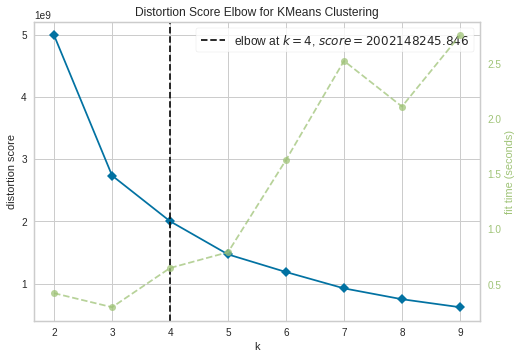

In [9]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km=KMeans(random_state=0)

visualizer=KElbowVisualizer(km, k=(2,10))
visualizer.fit(X)
visualizer.show()
plt.show()

##Silhouette

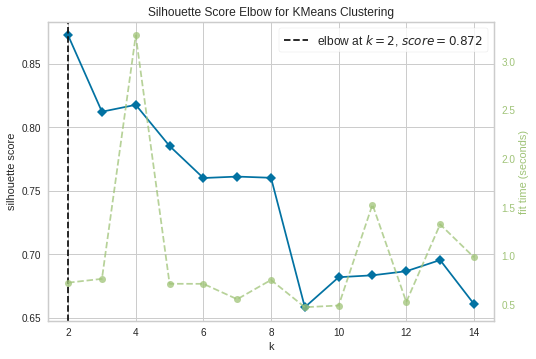

In [10]:
km=KMeans(random_state=0)
visualizer=KElbowVisualizer(km,k=(2,15),metric='silhouette')
visualizer.fit(X)
visualizer.show()
plt.show()

##KMeans Cluster

In [14]:
km=KMeans(n_clusters=10, random_state=0)
y_pred=km.fit_predict(X)
X['cluster']=y_pred
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,529,512,262,432,92,3,1,1,0,4
1,150,0,0,150,0,0,0,0,0,7
2,227,236,57,204,21,1,1,0,0,0
3,111,0,0,111,0,0,0,0,0,7
4,213,0,0,204,9,0,0,0,0,0


In [15]:
km.cluster_centers_

array([[ 3.59280142e+02,  4.16111111e+01,  7.67966903e+00,
         3.50015366e+02,  6.38888889e+00,  1.60401891e+00,
         6.40661939e-01,  5.16548463e-01,  1.01654846e-01],
       [ 7.16233333e+02,  8.01423333e+03,  6.99500000e+02,
         5.58533333e+02,  1.37666667e+02,  6.86666667e+00,
         8.63333333e+00,  3.16666667e+00,  1.36666667e+00],
       [ 1.17282937e+03,  7.10515873e+01,  1.86230159e+01,
         1.16132143e+03,  7.96428571e+00,  2.96031746e+00,
         4.20634921e-01,  7.53968254e-02,  7.14285714e-02],
       [ 4.24906977e+02,  4.38701163e+03,  3.92313953e+02,
         3.32720930e+02,  7.83953488e+01,  3.17441860e+00,
         7.45348837e+00,  2.43023256e+00,  7.32558140e-01],
       [ 2.27198131e+02,  6.84545794e+02,  1.68041121e+02,
         1.65564486e+02,  5.77813084e+01,  1.17383178e+00,
         1.94766355e+00,  4.00000000e-01,  3.27102804e-01],
       [ 2.77194444e+02,  1.94285417e+03,  3.13715278e+02,
         1.96729167e+02,  7.36527778e+01,  1.791666

#DBScan Cluster

In [20]:
from sklearn.cluster import DBSCAN
cluster=DBSCAN(eps=2.5,min_samples=4).fit(X)
y_pred=cluster.fit_predict(X)
X['cluster']=y_pred
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,529,512,262,432,92,3,1,1,0,-1
1,150,0,0,150,0,0,0,0,0,14
2,227,236,57,204,21,1,1,0,0,-1
3,111,0,0,111,0,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0,-1


In [21]:
cluster.labels_

array([-1, 14, -1, ...,  1, -1,  1])

##Plotting clusters for “num_reactions” vs “num_likes” 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


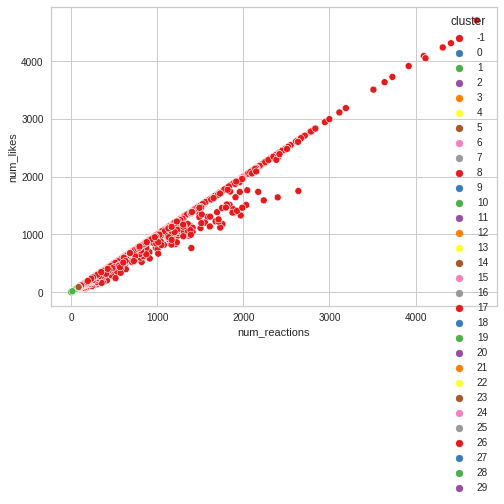

In [22]:
import seaborn as sns
sns.scatterplot('num_reactions','num_likes',data=X,hue=X['cluster'],palette='Set1',legend='full')